# JEST internal workshop &#8594; Intro to ML (Crash Course)

## This is an short version (without explanations) of the workshop, to access the full version of the document click [here](https://github.com/tamagusko/workshop-intro-ml/blob/main/introML.ipynb).

## Topics

1. Data Collection
2. Exploratory data analysis  
    2.1 Data visualization  
3. Preprocessing  
    3.1 Missing Data, Encoding, Standardizing, Feature Engineering  
    3.2 Split data in train/test
4. Model  
    4.1  Decision Tree  
    4.2. Random Forest  
    4.3. KNN (k-nearest neighbors)  
    4.4. XGBoost (eXtreme Gradient Boosting)  
    4.5. Neural Network (Multilayer perceptron)   
5. Comparison of models  
    5.1 Metrics  
    5.2 Receiver Operating Characteristic (ROC)  
6. Improving the model
7. Saving and loading models
8. Automating tasks (Choosing the best model)
---

---

# Practical example: Predicting Pulsar Star

More details in: [Predicting Pulsar Star](https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate)

## Proposed problem

Classify stars between Pulsar (1) and non-Pulsar (0).

Note: The data were collected and previously treated.
 
## 1. Data Collection

### Dataset - [pulsar_stars.csv](data/pulsar_stars.csv)

**rows**: 16,259 spurious examples (RFI/noise), and 1,639 real pulsar examples. Total of 17,898 rows.  

**columns**: 9 features, namely:  
  1. Mean of the integrated profile.
  2. Standard deviation of the integrated profile.
  3. Excess kurtosis of the integrated profile.
  4. Skewness of the integrated profile.
  5. Mean of the DM-SNR curve.
  6. Standard deviation of the DM-SNR curve.
  7. Excess kurtosis of the DM-SNR curve.
  8. Skewness of the DM-SNR curve.
  9. Class (1=Pulsar, 0=non-Pulsar)

So, the features are columns 1 to 8, and the label is the column 9.

In [1]:
# Data manipulation
import pandas as pd 
# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt

More details in [A Complete Pandas Guide](https://towardsdatascience.com/a-complete-pandas-guide-2dc53c77a002)

In [2]:
url = 'https://raw.githubusercontent.com/spingegod/ProjetoTI_part1/master/ProjetoTI/pulsar_stars.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


## 2. Exploratory data analysis

## 2.1 Data visualization

In [5]:
df.shape

(17898, 9)

In [6]:
df.tail()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0
17897,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


### View data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


### Data overview

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean of the integrated profile,17898.0,111.079968,25.652935,5.812500,100.929688,115.078125,127.085938,192.617188
Standard deviation of the integrated profile,17898.0,46.549532,6.843189,24.772042,42.376018,46.947479,51.023202,98.778911
Excess kurtosis of the integrated profile,17898.0,0.477857,1.064040,-1.876011,0.027098,0.223240,0.473325,8.069522
Skewness of the integrated profile,17898.0,1.770279,6.167913,-1.791886,-0.188572,0.198710,0.927783,68.101622
Mean of the DM-SNR curve,17898.0,12.614400,29.472897,0.213211,1.923077,2.801839,5.464256,223.392140
Standard deviation of the DM-SNR curve,17898.0,26.326515,19.470572,7.370432,14.437332,18.461316,28.428104,110.642211
Excess kurtosis of the DM-SNR curve,17898.0,8.303556,4.506092,-3.139270,5.781506,8.433515,10.702959,34.539844
Skewness of the DM-SNR curve,17898.0,104.857709,106.514540,-1.976976,34.960504,83.064556,139.309331,1191.000837
target_class,17898.0,0.091574,0.288432,0.000000,0.000000,0.000000,0.000000,1.000000


### NA values?

In [9]:
df.isna().any()

 Mean of the integrated profile                  False
 Standard deviation of the integrated profile    False
 Excess kurtosis of the integrated profile       False
 Skewness of the integrated profile              False
 Mean of the DM-SNR curve                        False
 Standard deviation of the DM-SNR curve          False
 Excess kurtosis of the DM-SNR curve             False
 Skewness of the DM-SNR curve                    False
target_class                                     False
dtype: bool

### Duplicate rows?

In [10]:
print("Duplicate rows: ", df.duplicated().sum())

Duplicate rows:  0


### Target (label) class

In [11]:
df.target_class.value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

<AxesSubplot:ylabel='target_class'>

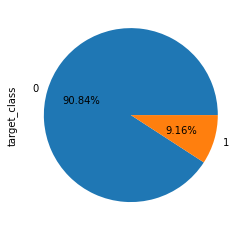

In [12]:
df.target_class.value_counts().plot.pie(autopct='%.2f%%')

### Correlation matrix

In [13]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm').set_precision(2)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.00,0.55,-0.87,-0.74,-0.30,-0.31,0.23,0.14,-0.67
Standard deviation of the integrated profile,0.55,1.00,-0.52,-0.54,0.01,-0.05,0.03,0.03,-0.36
Excess kurtosis of the integrated profile,-0.87,-0.52,1.00,0.95,0.41,0.43,-0.34,-0.21,0.79
Skewness of the integrated profile,-0.74,-0.54,0.95,1.00,0.41,0.42,-0.33,-0.20,0.71
Mean of the DM-SNR curve,-0.30,0.01,0.41,0.41,1.00,0.80,-0.62,-0.35,0.40
Standard deviation of the DM-SNR curve,-0.31,-0.05,0.43,0.42,0.80,1.00,-0.81,-0.58,0.49
Excess kurtosis of the DM-SNR curve,0.23,0.03,-0.34,-0.33,-0.62,-0.81,1.00,0.92,-0.39
Skewness of the DM-SNR curve,0.14,0.03,-0.21,-0.20,-0.35,-0.58,0.92,1.00,-0.26
target_class,-0.67,-0.36,0.79,0.71,0.40,0.49,-0.39,-0.26,1.00


### Data visualization ()

In [14]:
%%javascript
// Avoid scroll bar on very large images
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

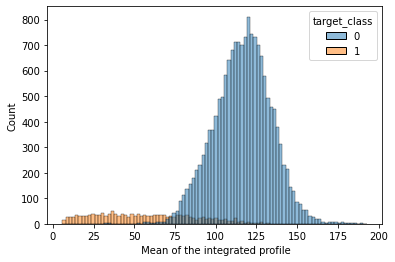

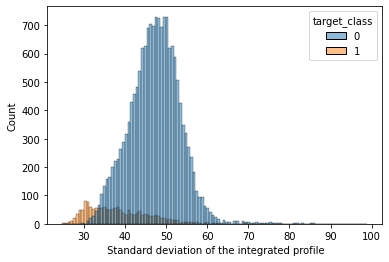

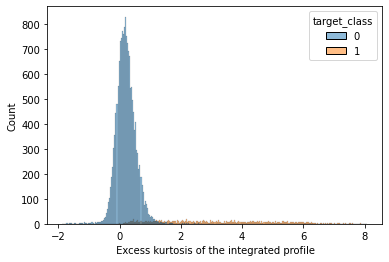

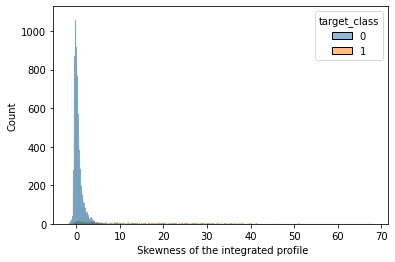

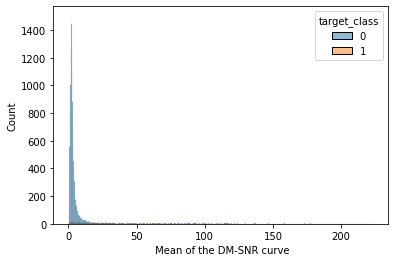

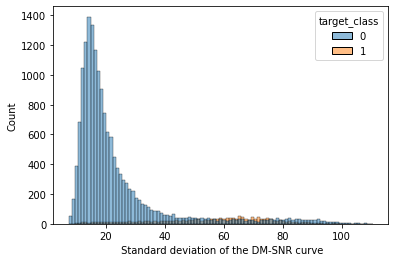

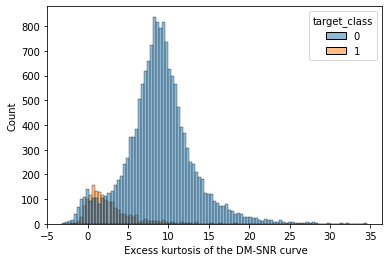

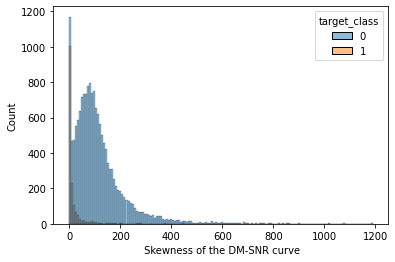

In [15]:
# Plots the histogram of all columns (excluding target_class).
for column in df.columns[:-1]:
    plt.figure()
    sns.histplot(x=df[column], hue=df.target_class)

## 3 Preprocessing

### 3.1 Missing Data, Encoding, Standardizing, Feature Engineering

Look in: [freecodecamp: Preprocessing](https://www.youtube.com/watch?v=0B5eIE_1vpU&t=2076s) (not necessary in this dataset)

### 3.2 Split data in train/test

In [16]:
X = df.drop(['target_class'], axis=1)
y = df.target_class

In [17]:
# Prepare data to train models
from sklearn.model_selection import train_test_split

# 50/50 (common: 70/30 or 80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.5, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8949, 8), (8949, 8), (8949,), (8949,))

## 4. Models

## How to use Scikit-Learn?

By [Andre Ye](https://www.linkedin.com/in/andre-ye-501746150/), in KDnuggets:[The Ultimate Scikit-Learn Machine Learning Cheatsheet](https://www.kdnuggets.com/2021/01/ultimate-scikit-learn-machine-learning-cheatsheet.html).

```python
# Import
from sklearn.BRANCH import MODEL_NAME
from sklearn.metrics import METRIC_NAME

# Build
MODEL = MODEL_NAME()

# Train
MODEL.fit(X_train, y_train)

# Predict
y_pred_MODEL = MODEL.predict(X_test)

# Eval 
METRIC = METRIC_NAME((y_test, y_pred_MODEL)) 
```

In [18]:
# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

*Confusion Matrix:*
\begin{pmatrix} 
True Negative & False Positive\\
False Negative & True Positive
\end{pmatrix} 

\begin{equation}
Accuracy = \frac{TP+TN}{(TP+TN+FP+FN)} \\
Precision = \frac{TP}{(TP+FP)} \\
MCC = \frac{TP*TN-FP*FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}} \\
\end{equation}

*where:*

*TP = True Positive  
TN = True Negative  
FP = False Positive  
FN = False Negative* 

In [19]:
# Simple functions to run metrics and print results

def evaluationModels(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    # Best metric for binary (0/1) classification 
    mcc = matthews_corrcoef(y_test, y_pred)
    fp = confusion_matrix(y_test, y_pred)[0][1]
    return accuracy, precision, mcc, fp


def printMetrics(model, accuracy, precision, mcc, fp):
    modelName = model.__class__.__name__
    bar = "-" * 25
    print(f"{bar}\n {modelName}\n{bar}")
    print(f'- Accuracy: {accuracy:0.3f}')
    print(f'- Precision: {precision:0.3f}')
    print(f'- MCC: {mcc:0.3f}')
    print(f'- False Positives: {fp}')

### 4.1 Decision Tree

See the parameters in: [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

More details in: [Decision Trees](https://scikit-learn.org/stable/modules/tree.html)

How to tune the parameters: [InDepth: Parameter tuning for Decision Tree](https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3)

In [20]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth=3, random_state=42)

In [21]:
# Training 
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [22]:
# Training parameters
DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [23]:
# Predict
y_pred_DT = DT.predict(X_test)

In [24]:
# Evaluation
accuracy, precision, mcc, fp = metricsDT = evaluationModels(y_test, y_pred_DT)
printMetrics(DT, accuracy, precision, mcc, fp)

-------------------------
 DecisionTreeClassifier
-------------------------
- Accuracy: 0.978
- Precision: 0.893
- MCC: 0.868
- False Positives: 85


MCC varies beetwen -1 (perfect negative correlation) and 1 (perfect positive correlation).
OBS: 0 (random flip)

In [25]:
confusion_matrix(y_test, y_pred_DT) # (TN FP \\ FN & TP)

array([[8045,   85],
       [ 109,  710]])

### Trick (worst possible threshold)

In [26]:
# Bad practice (don't do it)
import warnings
warnings.filterwarnings('ignore')

In [27]:
threshold = [0] * len(X_test)  # All results equal to 0

accuracy, precision, mcc, fp = metricsThreshold = evaluationModels(y_test, threshold)
printMetrics(threshold, accuracy, precision, mcc, fp)  # The name is not defined

-------------------------
 list
-------------------------
- Accuracy: 0.908
- Precision: 0.000
- MCC: 0.000
- False Positives: 0


In [28]:
# Feature Importance

featureImportanceDT = pd.DataFrame({'Feature': list(X_train.columns),
                                  'Importance': DT.feature_importances_}).\
    sort_values('Importance', ascending=False)

featureImportanceDT

,Feature,Importance
2,Excess kurtosis of the integrated profile,0.972950
5,Standard deviation of the DM-SNR curve,0.019431
0,Mean of the integrated profile,0.006398
1,Standard deviation of the integrated profile,0.001221
3,Skewness of the integrated profile,0.000000
4,Mean of the DM-SNR curve,0.000000
6,Excess kurtosis of the DM-SNR curve,0.000000
7,Skewness of the DM-SNR curve,0.000000


### 4.2 Random Forest

See the parameters in: [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

More details in: [Random Forests](https://scikit-learn.org/stable/modules/ensemble.html#random-forests)

How to tune the parameters: [Random Forest: Hyperparameters and how to fine-tune them](https://towardsdatascience.com/random-forest-hyperparameters-and-how-to-fine-tune-them-17aee785ee0d)

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Building (need to tune for better results)
RF = RandomForestClassifier(max_depth=4, random_state=42)

# Training 
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [30]:
# Training parameters
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [31]:
# Predict
y_pred_RF = RF.predict(X_test)

In [32]:
# Evaluating
accuracy, precision, mcc, fp = metricsRF = evaluationModels(y_test, y_pred_RF)
printMetrics(RF, accuracy, precision, mcc, fp)

-------------------------
 RandomForestClassifier
-------------------------
- Accuracy: 0.979
- Precision: 0.929
- MCC: 0.870
- False Positives: 52


In [33]:
# Feature Importance
featureImportanceRF = pd.DataFrame({'feature': list(X_train.columns),
                                  'importance': RF.feature_importances_}).\
    sort_values('importance', ascending=False)

featureImportanceRF

,feature,importance
2,Excess kurtosis of the integrated profile,0.410166
3,Skewness of the integrated profile,0.215174
0,Mean of the integrated profile,0.176768
4,Mean of the DM-SNR curve,0.059261
5,Standard deviation of the DM-SNR curve,0.054170
1,Standard deviation of the integrated profile,0.033804
7,Skewness of the DM-SNR curve,0.030396
6,Excess kurtosis of the DM-SNR curve,0.020261


### 4.3 K Nearest Neighbors (KNN)

See the parameters in: [sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

More details in: [Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Building
KNN = KNeighborsClassifier(metric='euclidean')

# Training 
KNN.fit(X_train, y_train)
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [35]:
# Predict
y_pred_KNN = KNN.predict(X_test)

In [36]:
# Evaluating
accuracy, precision, mcc, fp = metricsKNN = evaluationModels(y_test, y_pred_KNN)
printMetrics(KNN, accuracy, precision, mcc, fp)

-------------------------
 KNeighborsClassifier
-------------------------
- Accuracy: 0.972
- Precision: 0.892
- MCC: 0.827
- False Positives: 79


### 4.4 XGBoost (Ensemble model)

See the parameters in: [XGBoost Parameters](https://xgboost.readthedocs.io/en/latest/parameter.html)

More details in: [Getting Started with XGBoost in scikit-learn](https://towardsdatascience.com/getting-started-with-xgboost-in-scikit-learn-f69f5f470a97)

* XGBoost is regularized (avoid overfit).
* XGBoost Have hyperparameters to handle imbalanced data and null values.
* Combine some of the best practices and algorithms in a single model.
* Fast and easy to use.
* It is my go-to algorithm for dealing with structured data.

In [37]:
import xgboost as xgb

# Building (need to tune for better results)
XGB = xgb.XGBClassifier(max_depth=4, random_state=42)

# Training 
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
# Training parameters
XGB.get_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 4,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [39]:
# Predict
y_pred_XGB = XGB.predict(X_test)

In [40]:
# Evaluating
accuracy, precision, mcc, fp = metricsXGB = evaluationModels(y_test, y_pred_XGB)
printMetrics(XGB, accuracy, precision, mcc, fp)

-------------------------
 XGBClassifier
-------------------------
- Accuracy: 0.979
- Precision: 0.912
- MCC: 0.868
- False Positives: 67


In [41]:
# Feature Importance
featureImportanceXGB = pd.DataFrame({'feature': list(X_train.columns),
                                  'importance': XGB.feature_importances_}).\
    sort_values('importance', ascending=False)

featureImportanceXGB

,feature,importance
2,Excess kurtosis of the integrated profile,0.705079
5,Standard deviation of the DM-SNR curve,0.066338
1,Standard deviation of the integrated profile,0.043162
6,Excess kurtosis of the DM-SNR curve,0.040389
0,Mean of the integrated profile,0.038011
3,Skewness of the integrated profile,0.037221
4,Mean of the DM-SNR curve,0.035053
7,Skewness of the DM-SNR curve,0.034746


### 4.5 Neural Network: Multi-Layer Perceptron (MLP) - Most simple NN model

See the parameters in: [sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

More details in: [Multi-layer Perceptron (MLP)](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

In [42]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(alpha=1, max_iter=1000)

# Training 
MLP.fit(X_train, y_train)

MLPClassifier(alpha=1, max_iter=1000)

In [43]:
# Training parameters
MLP.get_params()

{'activation': 'relu',
 'alpha': 1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [44]:
# Predict
y_pred_MLP = MLP.predict(X_test)

In [45]:
# Evaluating
accuracy, precision, mcc, fp = metricsMLP = evaluationModels(y_test, y_pred_MLP)
printMetrics(MLP, accuracy, precision, mcc, fp)

-------------------------
 MLPClassifier
-------------------------
- Accuracy: 0.971
- Precision: 0.827
- MCC: 0.829
- False Positives: 148


## 5. Comparison of models

### 5.1 Metrics

In [46]:
results_accuracy = {
    'Threshold': metricsThreshold[0],
    'DT': metricsDT[0],
    'RF': metricsRF[0],
    'KNN': metricsKNN[0],
    'MLP': metricsMLP[0],
    'XGB': metricsXGB[0],
    
}
results_precision = {
    'Threshold': metricsThreshold[1],
    'DT': metricsDT[1],
    'RF': metricsRF[1],
    'KNN': metricsKNN[1],
    'MLP': metricsMLP[1],
    'XGB': metricsXGB[1],
}
results_mcc = {
    'Threshold': metricsThreshold[2],
    'DT': metricsDT[2],
    'RF': metricsRF[2],
    'KNN': metricsKNN[2],
    'MLP': metricsMLP[2],
    'XGB': metricsXGB[2],
}

results_fp = {
    'Threshold': metricsThreshold[3],
    'DT': metricsDT[3],
    'RF': metricsRF[3],
    'KNN': metricsKNN[3],
    'MLP': metricsMLP[3],
    'XGB': metricsXGB[3],
}

acc_df = pd.DataFrame.from_dict(results_accuracy, orient='index', columns=['Accuracy'])
precision_df = pd.DataFrame.from_dict(results_precision, orient='index', columns=['Precision'])
mcc_df = pd.DataFrame.from_dict(results_mcc, orient='index', columns=['MCC'])
fp_df = pd.DataFrame.from_dict(results_fp, orient='index', columns=['FP'])
results = pd.concat([acc_df, precision_df, mcc_df, fp_df], axis=1)
results

,Accuracy,Precision,MCC,FP
Threshold,0.908481,0.000000,0.000000,0
DT,0.978322,0.893082,0.868007,85
RF,0.979104,0.929348,0.869823,52
KNN,0.972399,0.891781,0.827126,79
MLP,0.970946,0.826901,0.828899,148
XGB,0.978657,0.912073,0.868180,67


### 5.2 Receiver Operating Characteristic (ROC)

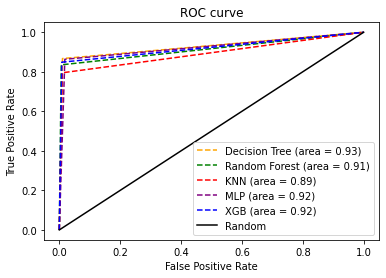

In [47]:
fpr_DT, tpr_DT, _ = roc_curve(y_test, y_pred_DT)
fpr_RF, tpr_RF, _ = roc_curve(y_test, y_pred_RF)
fpr_KNN, tpr_KNN, _ = roc_curve(y_test, y_pred_KNN)
fpr_MLP, tpr_MLP, _ = roc_curve(y_test, y_pred_MLP)
fpr_XGB, tpr_XGB, _ = roc_curve(y_test, y_pred_XGB)
roc_auc_DT = auc(fpr_DT, tpr_DT)
roc_auc_RF = auc(fpr_RF, tpr_RF)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
roc_auc_MLP = auc(fpr_MLP, tpr_MLP)
roc_auc_XGB = auc(fpr_XGB, tpr_XGB) 

plt.plot(fpr_DT, 
         tpr_DT,
         color='orange',
         linestyle='--',
         label=f'Decision Tree (area = {roc_auc_DT:0.2f})')
plt.plot(fpr_RF, 
         tpr_RF,
         color='green',
         linestyle='--',
         label=f'Random Forest (area = {roc_auc_RF:0.2f})')
plt.plot(fpr_KNN, 
         tpr_KNN,
         color='red',
         linestyle='--',
         label=f'KNN (area = {roc_auc_KNN:0.2f})')
plt.plot(fpr_MLP, 
         tpr_MLP,
         color='purple',
         linestyle='--',
         label=f'MLP (area = {roc_auc_MLP:0.2f})')
plt.plot(fpr_XGB, 
         tpr_XGB,
         color='blue',
         linestyle='--',
         label=f'XGB (area = {roc_auc_XGB:0.2f})')
# plt.plot([0,0,1,1],[0,1,1,1],color='blue',label='Perfect')
plt.plot([0, 1], [0, 1], color='black', linestyle='-', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

More details in [Receiver Operating Characteristic (ROC)](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) and [Entenda o que é AUC e ROC nos modelos de Machine Learning](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772)

## 6. Improving the model

What can we do better? 

- Be careful in this improvement phase that we often make the model worse.

In [48]:
from sklearn.model_selection import GridSearchCV
# Try possible combinations of the parameters and find the best ones.

from sklearn.model_selection import RandomizedSearchCV
# Random search for the best parameters (slow and computationally intensive).

from sklearn.ensemble import StackingClassifier
# Combine algorithms and make a hybrid model.

More details in [Machine Learning: GridSearchCV & RandomizedSearchCV](https://towardsdatascience.com/machine-learning-gridsearchcv-randomizedsearchcv-d36b89231b10) and [Stacking made easy with Sklearn](https://towardsdatascience.com/stacking-made-easy-with-sklearn-e27a0793c92b).

## 7. Save Model (doesn't work in the colab env)

```python
import pickle
import datetime

current_date: str = datetime.date.today().strftime("%Y-%m-%d")
    
# save models
filename_DT = f'models/{current_date}_Pulsar_DT.mlmodel'
pickle.dump(DT, open(filename_DT, 'wb'))

filename_RF = f'models/{current_date}_Pulsar_RF.mlmodel'
pickle.dump(RF, open(filename_RF, 'wb'))

filename_KNN = f'models/{current_date}_Pulsar_KNN.mlmodel'
pickle.dump(KNN, open(filename_KNN, 'wb'))

filename_MLP = f'models/{current_date}_Pulsar_MLP.mlmodel'
pickle.dump(MLP, open(filename_MLP, 'wb'))

filename_XGB = f'models/{current_date}_Pulsar_XGB.mlmodel'
pickle.dump(XGB, open(filename_XGB, 'wb'))
```

## 7.1 Load model (doesn't work in the colab env)

```python
loaded_model = pickle.load(open(filename_RF, 'rb'))

# In real life you will use data from the production pipeline.
result = loaded_model.score(X_test, y_test)

print(f'Random Forest: {result:0.3f}')
```

Random Forest: 0.979


## 8. Automating boring tasks (Choosing the best model)

In [49]:
# importing more models

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [50]:
results_cols = ["Classifier", "Accuracy", "Precision", "MCC", "False Positives"]
results = pd.DataFrame(columns = results_cols)

# Models
classifiers = [
    DecisionTreeClassifier(max_depth=3, random_state=42),
    RandomForestClassifier(max_depth=4, random_state=42),
    KNeighborsClassifier(metric='euclidean'),
    xgb.XGBClassifier(max_depth=4, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(max_depth=4, random_state=42),
    GaussianNB()
]

In [51]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    method = clf.__class__.__name__
    y_pred = clf.predict(X_test)
    accuracy, precision, mcc, fp = evaluationModels(y_test, y_pred)
    printMetrics(clf, accuracy, precision, mcc, fp)
    
    temp = pd.DataFrame([[method, accuracy * 100, precision * 100, mcc * 100, fp]], columns = results_cols)
    results = results.append(temp)

-------------------------
 DecisionTreeClassifier
-------------------------
- Accuracy: 0.978
- Precision: 0.893
- MCC: 0.868
- False Positives: 85
-------------------------
 RandomForestClassifier
-------------------------
- Accuracy: 0.979
- Precision: 0.929
- MCC: 0.870
- False Positives: 52
-------------------------
 KNeighborsClassifier
-------------------------
- Accuracy: 0.972
- Precision: 0.892
- MCC: 0.827
- False Positives: 79
-------------------------
 XGBClassifier
-------------------------
- Accuracy: 0.979
- Precision: 0.912
- MCC: 0.868
- False Positives: 67
-------------------------
 MLPClassifier
-------------------------
- Accuracy: 0.976
- Precision: 0.953
- MCC: 0.848
- False Positives: 31
-------------------------
 AdaBoostClassifier
-------------------------
- Accuracy: 0.978
- Precision: 0.928
- MCC: 0.863
- False Positives: 52
-------------------------
 GradientBoostingClassifier
-------------------------
- Accuracy: 0.977
- Precision: 0.890
- MCC: 0.861
- Fals

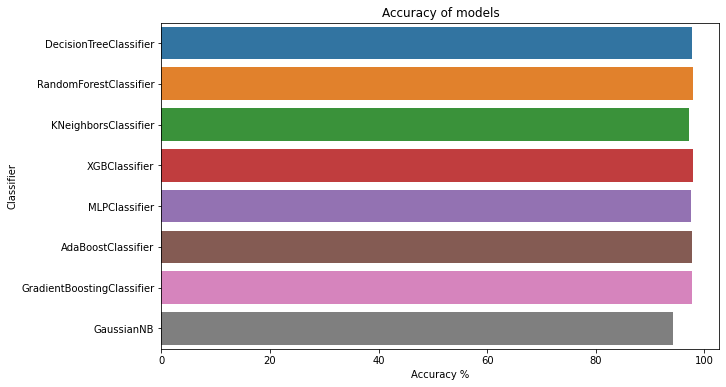

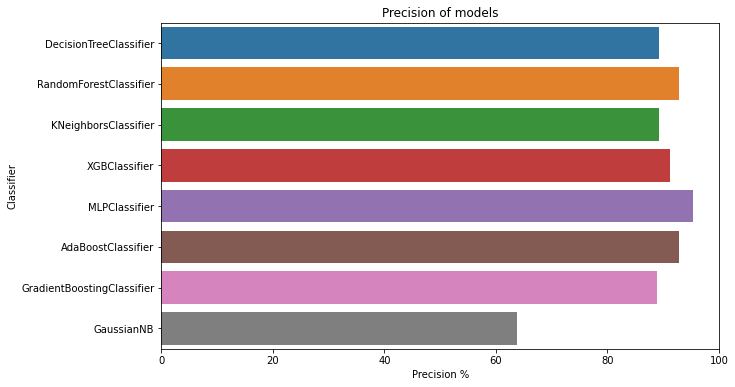

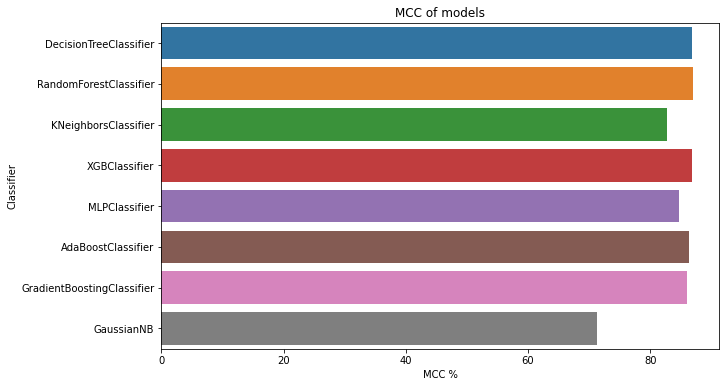

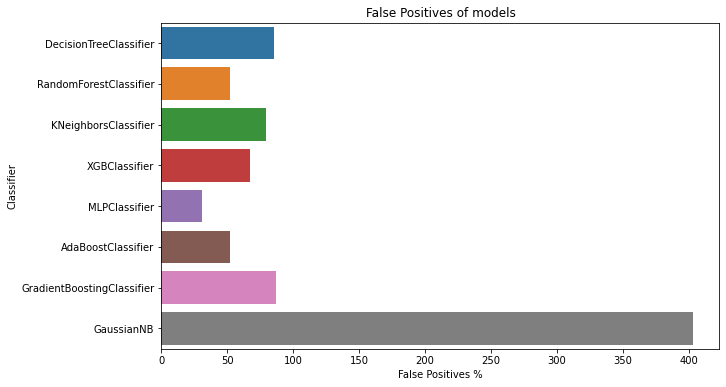

In [52]:
for metrics in results_cols[1:]:
    plt.figure(figsize = (10,6))
    sns.barplot(x = metrics, y = 'Classifier', data = results)
    plt.xlabel(f'{metrics} %')
    plt.title(f'{metrics} of models')
    plt.show()

In [53]:
results.sort_values('MCC', ascending=False)

,Classifier,Accuracy,Precision,MCC,False Positives
0,RandomForestClassifier,97.910381,92.934783,86.982279,52
0,XGBClassifier,97.865683,91.207349,86.818047,67
0,DecisionTreeClassifier,97.832160,89.308176,86.800703,85
0,AdaBoostClassifier,97.809811,92.847318,86.311296,52
0,GradientBoostingClassifier,97.720416,88.973384,86.079695,87
0,MLPClassifier,97.597497,95.345345,84.762744,31
0,KNeighborsClassifier,97.239915,89.178082,82.712574,79
0,GaussianNB,94.256341,63.726373,71.257658,403
